# Project 1 - Iowa Liquor 

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and wants a report of current liquor sales by county and projections for the rest of the year. 

Your task is as follows:

* Calculate the yearly liquor sales for each store using the provided data. You can add up the transactions for each year, and store sales in 2015 specifically will be used later as your target variable.
* Use the data from 2015 to make a linear model using as many variables as you find useful to predict the yearly sales of all stores. You must use the sales from Jan to March as one of your variables.
* Use your model for 2015 to estimate total sales in 2016, extrapolating from the sales so far for Jan-March of 2016.
* Report your findings, including any projected increase or decrease in total sales (over the entire state) for the tax committee of the Iowa legislature.
* Use cross-validation to check how your model predicts to held out data compared to the model metrics on the full dataset.
* Fit your model(s) using one or both of the regularization tactics covered. Explain whether the regularized or the non-regularized model performed better and what the selected regression(s) are doing.



# Part 2

### Feature Engineering, Model Building, and Tuning

In Part 2 of this two-part project, you will use the insights gained from your Exploratory Data Analysis (EDA) to build a linear regression model predicting end-of-year total sales using Q1 data. You will use 2015 data to train and tune your model, then make final predictions using Q1 2016 data to make your best estimates for end of year 2016!

### Requirements:


**Mine the data**
- Create necessary derived columns from the data
- Format, clean, slice, and combine the data in Python

**Build a data model**
- Complete linear regressions using scikit-learn or statsmodels and interpret your findings
- Calculate and plot predicted probabilities and/or present tables of results
- Describe the bias-variance tradeoff of your model and errors metrics
- Evaluate model fit by using loss functions, including mean absolute error, mean squared error, and root mean squared error, or r-squared

**Present the results**
- Create a Jupyter Notebook hosted on GitHub that provides a dataset overview with visualizations, statistical analysis, data cleaning methodologies, and models
- Create a write-up on the interpretation of findings including an executive summary with conclusions and next steps

***Bonus!:***
- Handle outliers, use regularization (Ridge & Lasso regressions)
- Brainstorm ways to improve your analysis; for example:
 - Add additional breakdowns and models, e.g. by month.
 - Recommend additional data that might improve your models
 - Can you think of other uses for the dataset? E.g healthcare / disease estimates

In [54]:
import os

os.path.isfile('../Assets/Iowa_Liquor_sample.csv') 

True

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Import and Clean data:

This time, we've cleaned the data set and column names for you; however we have not touched missing values.

In [56]:
# Import, convert 'Date' col to datetime
liquor=pd.read_csv('../Assets/Iowa_Liquor_sample.csv',parse_dates=['Date'],infer_datetime_format=True)

In [57]:
# format column names
import re

liquor.columns = [re.sub("[^a-zA-Z]+", "", x) for x in liquor.columns]

In [58]:
# remove '$' in values and convert to numeric
adjust_cols = ['StateBottleCost','StateBottleRetail','SaleDollars']

for col in adjust_cols:
    liquor[col] = pd.to_numeric(liquor[col].str.replace('$',''),errors='coerce')

### Null Values

Handle null values as you see fit

In [59]:
# liquor = liquor.dropna()
# liquor.isnull().sum()

In [60]:
liquor.isnull().sum()

Date                    0
StoreNumber             0
City                    0
ZipCode                 0
CountyNumber         1077
County               1077
Category               68
CategoryName          632
VendorNumber            0
ItemNumber              0
ItemDescription         0
BottleVolumeml          0
StateBottleCost         0
StateBottleRetail       0
BottlesSold             0
SaleDollars             0
VolumeSoldLiters        0
VolumeSoldGallons       0
dtype: int64

In [61]:
null_data = liquor[liquor.isnull().any(axis=1)] 

In [62]:
null_data

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
135,2016-01-20,5222,CEDAR RAPIDS,52402,NaN,NaN,1051010.0,AMERICAN GRAPE BRANDIES,115,53214,Paul Masson Grande Amber Brandy,375,3.22,4.83,24,115.92,9.00,2.38
198,2016-03-02,3820,SIOUX CITY,51103,NaN,NaN,1032080.0,IMPORTED VODKA,35,34359,Grey Goose Vodka,200,5.00,7.50,12,90.00,2.40,0.63
272,2016-03-21,4222,EVANSDALE,50707,NaN,NaN,1062300.0,FLAVORED RUM,370,42716,Malibu Coconut Rum,750,7.49,11.24,3,33.72,2.25,0.59
290,2016-03-21,5236,ANAMOSA,52205,NaN,NaN,1081600.0,WHISKEY LIQUEUR,421,64868,Fireball Cinnamon Whiskey,1750,15.33,23.00,6,138.00,10.50,2.77
321,2016-02-23,4203,WAVERLY,50677,NaN,NaN,1051100.0,APRICOT BRANDIES,434,55084,Paramount Blackberry Brandy,375,3.55,5.33,24,127.92,9.00,2.38
863,2016-01-11,2460,HAMPTON,50441,NaN,NaN,1011200.0,STRAIGHT BOURBON WHISKIES,461,77776,Wild Turkey American Honey,750,10.50,15.75,3,47.25,2.25,0.59
896,2015-02-05,4829,DES MOINES,50314,77.0,Polk,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750,23.58,35.37,6,212.22,4.50,1.19
901,2016-02-25,4647,WATERLOO,50707,7.0,Black Hawk,1052100.0,NaN,420,48099,Hennessy VS,200,5.74,8.61,24,206.64,4.80,1.27
964,2015-05-19,4247,BELMOND,50421,NaN,NaN,1012100.0,CANADIAN WHISKIES,55,12408,Canadian Ltd Whisky,1750,9.14,13.71,6,82.26,10.50,2.77
982,2016-03-30,5222,CEDAR RAPIDS,52402,NaN,NaN,1031080.0,VODKA 80 PROOF,300,36904,Mccormick Vodka Pet,375,1.80,2.70,24,64.80,9.00,2.38


There are 1,8882 observations that have any missing values in any of our variables. The only variables that have missing values are Zip Code, County Number, County Name, Liquor Category Number, and Category Name. Given that we have 270,955 observations, obserations that have missing values constitute only 0.7% of our dataset. We can clean the dataset using a crosswalk of Zip Codes, County name/number, and liquor categories, but would have to balance against the time value of creating this crosswalk. 0.7% is a small percentage of data I am willing to foresake/drop for.

In [63]:
liquor = liquor.dropna()

In [64]:
liquor.isnull().sum()

Date                 0
StoreNumber          0
City                 0
ZipCode              0
CountyNumber         0
County               0
Category             0
CategoryName         0
VendorNumber         0
ItemNumber           0
ItemDescription      0
BottleVolumeml       0
StateBottleCost      0
StateBottleRetail    0
BottlesSold          0
SaleDollars          0
VolumeSoldLiters     0
VolumeSoldGallons    0
dtype: int64

## Split Data to Create a features and targets

The goal of this project is to predict **total year-end 2015 sales for each store** using **first-quarter 2015 data**

Our data is currently formatted as total purchases for each product per day per store for every day in the year. We will need to group our data by store when we perform our aggregations.

In order to accomplish our goal, we need two sets of data:
* Total full-year  sales for each store in 2015 (our target / y)
* Data from Q1 2015 (will become our features / X)

Create two dataframes, 'liquor2015_fy' and 'liquor2015_q1'

'liquor2015_fy' should contain only store numbers and the full year sales for that store

'liquor2015_q1' should contain all your features, but only for Q1


In [65]:
liquor

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53


In [66]:
# Filter to only 2015:
# hint: liquor.Date.dt._______

liquor2015 = liquor[liquor['Date'].dt.year == 2015]
#Cite: https://stackoverflow.com/questions/45613501/filter-dataframe-in-pandas-by-a-date-column

In [67]:
liquor2015

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53
10,2015-09-28,2648,WEST DES MOINES,50265,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,65,19235,Knob Creek Single Barrel Reserve,750,26.24,39.36,6,236.16,4.50,1.19
11,2015-10-28,2600,OSKALOOSA,52577,62.0,Mahaska,1071100.0,AMERICAN COCKTAILS,55,57148,Chi-Chi's Margarita W/tequila,1750,6.00,9.25,6,55.50,10.50,2.77
12,2015-01-22,3858,DAVENPORT,52806,82.0,Scott,1012100.0,CANADIAN WHISKIES,65,15248,Windsor Canadian Pet,1750,8.92,13.38,1,13.38,1.75,0.46
15,2015-06-10,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,4,27.00,3.00,0.79


In [68]:
# Calculate the sum of sales for each store in 2015 by grouping the full year data
# hint: what columns do you need? what is your aggregating function? 
liquor2015_fy = liquor2015.groupby('StoreNumber').sum()
liquor2015_fy

,CountyNumber,Category,VendorNumber,ItemNumber,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
StoreNumber,,,,,,,,,,,
2106,3682.0,5.516445e+08,143582,33531134,477600,5417.16,8131.82,10355,146038.70,9719.85,2568.16
2113,13818.0,1.524763e+08,34968,6358241,139125,1597.97,2398.40,671,9310.22,659.85,174.29
2130,2737.0,4.092679e+08,101407,20359013,363550,3840.70,5763.64,7418,111583.91,6879.37,1817.48
2152,2397.0,1.468066e+08,33833,5603803,149500,1207.67,1817.16,573,7721.08,633.37,167.28
2178,711.0,2.474773e+08,54476,10550395,241700,2296.49,3450.41,1928,24324.18,1917.12,506.50
2190,101255.0,1.368621e+09,329163,74567726,1057300,15142.84,22735.99,11111,121689.06,6322.17,1671.50
2191,33376.0,6.284663e+08,158192,29945364,586625,6883.31,10327.05,7696,125093.49,8053.32,2127.56
2200,32643.0,4.207239e+08,94868,16869716,450550,4516.61,6781.82,1668,22811.55,1817.24,480.01
2205,20951.0,3.015568e+08,72949,11872593,252600,2906.55,4365.27,1880,24623.01,1555.41,410.91


In [69]:
liquor2015_fy.drop(['CountyNumber', 'Category', 'Category', 'VendorNumber', 'ItemNumber','BottleVolumeml','StateBottleCost','StateBottleRetail','BottlesSold','VolumeSoldLiters','VolumeSoldGallons'], axis=1, inplace=True)

In [70]:
liquor2015_fy.head()

,SaleDollars
StoreNumber,
2106,146038.70
2113,9310.22
2130,111583.91
2152,7721.08
2178,24324.18


In [71]:
# Filter to just Q1 data: 
# hint: df[df.Date.dt.___ == __]

liquor2015_q1 = liquor[(liquor['Date'] > '2015-1-1') & (liquor['Date'] <= '2015-3-31')]
liquor2015_q1                       

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
12,2015-01-22,3858,DAVENPORT,52806,82.0,Scott,1012100.0,CANADIAN WHISKIES,65,15248,Windsor Canadian Pet,1750,8.92,13.38,1,13.38,1.75,0.46
19,2015-03-04,2614,DAVENPORT,52807,82.0,Scott,1012100.0,CANADIAN WHISKIES,434,13638,Lord Calvert Canadian Whisky,1750,9.97,14.96,6,89.76,10.50,2.77
20,2015-01-16,2590,CEDAR RAPIDS,52402,57.0,Linn,1031200.0,VODKA FLAVORED,971,41474,44 North Huckleberry,750,14.25,21.38,2,42.76,1.50,0.40
21,2015-01-13,3942,TOLEDO,52342,86.0,Tama,1012100.0,CANADIAN WHISKIES,115,11786,Black Velvet Traveler,750,5.23,7.85,12,94.20,9.00,2.38
22,2015-03-24,3981,SIOUX CENTER,51250,84.0,Sioux,1011100.0,BLENDED WHISKIES,260,25606,Seagrams 7 Crown Bl Whiskey,750,7.00,10.50,12,126.00,9.00,2.38
25,2015-02-03,3390,MILFORD,51351,30.0,Dickinson,1011300.0,TENNESSEE WHISKIES,85,26827,Jack Daniels Old #7 Black Lbl,1000,17.90,26.85,24,644.40,24.00,6.34
29,2015-01-14,2545,IOWA CITY,52245,52.0,Johnson,1081600.0,WHISKEY LIQUEUR,260,66199,Piehole Apple Pie Mini,500,4.90,7.35,1,7.35,0.50,0.13
31,2015-01-12,2555,KEOKUK,52632,56.0,Lee,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,65,73533,Dekuyper 03,750,12.07,18.11,2,36.22,1.50,0.40
32,2015-01-16,2549,INDIANOLA,50125,91.0,Warren,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55
33,2015-01-13,2644,FORT DODGE,50501,94.0,Webster,1081305.0,APPLE SCHNAPPS,65,82607,Dekuyper Sour Apple,1000,7.62,11.43,12,137.16,12.00,3.17


# Feature Engineering

Using the insight your gained into your dataset while perfomorming *exploratory data analysis* in Part 1 of the project, aggregate the liquor2015_q1 data frame to create cross-sectional features from our longitudinal data.


[Aggregation functions in pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

In addition to aggregation, you may chose to create columns to more advanced measures of the data, such as sales for a particular product or category, measures of profitbility, daily or weekly sales statistics, etc.

Combine your aggregations and other engineered features into a dataframe called 'liquor2015_q1_features'

*At a minimum, you will need to aggreate your features by Store in order to procede*



In [77]:
liquor2015_q1.groupby('StoreNumber').agg('sum')

,CountyNumber,Category,VendorNumber,ItemNumber,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
StoreNumber,,,,,,,,,,,
2106,903.0,135781951.0,36427,9581961,114350,1295.36,1944.71,2705,39287.29,2526.10,667.41
2113,3948.0,43582910.0,11030,1875932,35875,442.94,664.49,196,2833.25,177.11,46.80
2130,609.0,91579237.0,22567,4917259,83150,892.66,1339.92,1533,24272.57,1447.25,382.33
2152,544.0,33222330.0,7734,1196248,35000,307.97,462.75,154,2003.46,151.74,40.08
2178,144.0,50160670.0,11224,2126804,47325,471.19,707.93,490,5856.41,409.81,108.28
2190,26719.0,360209117.0,87397,15214788,280950,3785.16,5682.57,2557,29452.92,1666.58,440.59
2191,8456.0,157558712.0,38978,7999904,154725,1755.59,2635.55,1868,29085.57,1957.28,517.02
2200,6804.0,87576155.0,20251,3985277,94700,984.17,1478.01,338,4900.43,367.72,97.13
2205,5110.0,72547570.0,18596,2828767,61475,744.03,1116.71,466,6407.74,375.38,99.15


In [92]:
def profitable(row):
    if row["CategoryName"] == "CANADIAN WHISKIES":
        return row["SaleDollars"]
    elif row["CategoryName"] == "VODKA 80 PROOF":
        return row["SaleDollars"]
    elif row["CategoryName"] == "SPICED RUM":
        return row["SaleDollars"]
    elif row["CategoryName"] == "IMPORTED VODKA":
        return row["SaleDollars"]
    elif row["CategoryName"] == "STRAIGHT BOURBON WHISKIES":
        return row["SaleDollars"]
    else:
        return 0
    
liquor2015_q1 = liquor2015_q1.assign(profitableliq=liquor2015_q1.apply(profitable, axis=1))

As per my EDA in Iowa Liquor Part 1, I identified the most profitable categories of liquor. Taking the top 5 categories, I am calculating each store's total sales resulting from these liquor categories as a proxy to estimate 2015 sales.

In [93]:
liquor2015_q1

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons,profitableliq
12,2015-01-22,3858,DAVENPORT,52806,82.0,Scott,1012100.0,CANADIAN WHISKIES,65,15248,Windsor Canadian Pet,1750,8.92,13.38,1,13.38,1.75,0.46,13.38
19,2015-03-04,2614,DAVENPORT,52807,82.0,Scott,1012100.0,CANADIAN WHISKIES,434,13638,Lord Calvert Canadian Whisky,1750,9.97,14.96,6,89.76,10.50,2.77,89.76
20,2015-01-16,2590,CEDAR RAPIDS,52402,57.0,Linn,1031200.0,VODKA FLAVORED,971,41474,44 North Huckleberry,750,14.25,21.38,2,42.76,1.50,0.40,0.00
21,2015-01-13,3942,TOLEDO,52342,86.0,Tama,1012100.0,CANADIAN WHISKIES,115,11786,Black Velvet Traveler,750,5.23,7.85,12,94.20,9.00,2.38,94.20
22,2015-03-24,3981,SIOUX CENTER,51250,84.0,Sioux,1011100.0,BLENDED WHISKIES,260,25606,Seagrams 7 Crown Bl Whiskey,750,7.00,10.50,12,126.00,9.00,2.38,0.00
25,2015-02-03,3390,MILFORD,51351,30.0,Dickinson,1011300.0,TENNESSEE WHISKIES,85,26827,Jack Daniels Old #7 Black Lbl,1000,17.90,26.85,24,644.40,24.00,6.34,0.00
29,2015-01-14,2545,IOWA CITY,52245,52.0,Johnson,1081600.0,WHISKEY LIQUEUR,260,66199,Piehole Apple Pie Mini,500,4.90,7.35,1,7.35,0.50,0.13,0.00
31,2015-01-12,2555,KEOKUK,52632,56.0,Lee,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,65,73533,Dekuyper 03,750,12.07,18.11,2,36.22,1.50,0.40,0.00
32,2015-01-16,2549,INDIANOLA,50125,91.0,Warren,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55,129.60
33,2015-01-13,2644,FORT DODGE,50501,94.0,Webster,1081305.0,APPLE SCHNAPPS,65,82607,Dekuyper Sour Apple,1000,7.62,11.43,12,137.16,12.00,3.17,0.00


In [94]:
liquor2015_q1['Profit'] = (liquor2015_q1.StateBottleRetail - liquor2015_q1.StateBottleCost) * liquor2015_q1.BottlesSold

In [96]:
liquor2015_q1.groupby('StoreNumber').agg('sum')

,CountyNumber,Category,VendorNumber,ItemNumber,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons,profitableliq,Profit
StoreNumber,,,,,,,,,,,,,
2106,903.0,135781951.0,36427,9581961,114350,1295.36,1944.71,2705,39287.29,2526.10,667.41,15893.52,13108.37
2113,3948.0,43582910.0,11030,1875932,35875,442.94,664.49,196,2833.25,177.11,46.80,1100.62,944.72
2130,609.0,91579237.0,22567,4917259,83150,892.66,1339.92,1533,24272.57,1447.25,382.33,11541.27,8108.68
2152,544.0,33222330.0,7734,1196248,35000,307.97,462.75,154,2003.46,151.74,40.08,1379.52,668.60
2178,144.0,50160670.0,11224,2126804,47325,471.19,707.93,490,5856.41,409.81,108.28,2667.45,1961.28
2190,26719.0,360209117.0,87397,15214788,280950,3785.16,5682.57,2557,29452.92,1666.58,440.59,9817.38,9828.30
2191,8456.0,157558712.0,38978,7999904,154725,1755.59,2635.55,1868,29085.57,1957.28,517.02,10870.28,9723.40
2200,6804.0,87576155.0,20251,3985277,94700,984.17,1478.01,338,4900.43,367.72,97.13,2517.44,1641.80
2205,5110.0,72547570.0,18596,2828767,61475,744.03,1116.71,466,6407.74,375.38,99.15,3306.38,2138.97


In [99]:
# Dataframe of your Q1 features
liquor2015_q1_features = liquor2015_q1.groupby('StoreNumber').agg('sum')

In [101]:
liquor2015_q1_features.drop(['CountyNumber','Category','VendorNumber','ItemNumber'],axis=1,inplace=True)

In [102]:
liquor2015_q1_features

,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons,profitableliq,Profit
StoreNumber,,,,,,,,,
2106,114350,1295.36,1944.71,2705,39287.29,2526.10,667.41,15893.52,13108.37
2113,35875,442.94,664.49,196,2833.25,177.11,46.80,1100.62,944.72
2130,83150,892.66,1339.92,1533,24272.57,1447.25,382.33,11541.27,8108.68
2152,35000,307.97,462.75,154,2003.46,151.74,40.08,1379.52,668.60
2178,47325,471.19,707.93,490,5856.41,409.81,108.28,2667.45,1961.28
2190,280950,3785.16,5682.57,2557,29452.92,1666.58,440.59,9817.38,9828.30
2191,154725,1755.59,2635.55,1868,29085.57,1957.28,517.02,10870.28,9723.40
2200,94700,984.17,1478.01,338,4900.43,367.72,97.13,2517.44,1641.80
2205,61475,744.03,1116.71,466,6407.74,375.38,99.15,3306.38,2138.97


## Combine Q1 Features with Full Year Target

Now that you've created a set of features using the Q1 data, we much combine it wil the full-year data so that our Xs (features) are matched up to their coresponding y's (targets).

Pandas' 'merge' function allows us to combine two dataframes, using SQL-like joins.

[Pandas Merge/Join Documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging)

We will create a new dataframe, called 'liquor2015_combined' by merging our 'liquor2015_fy' and 'liquor2015_q1_features' dataframes on Store Number - giving us a dataframe which in each row has the Q1 features you've developed for each store, and the year-end total sales for that store.

#### In pandas, merge can take two forms:

pd.merge(left_dataframe,right_dataframe, \*\*args)

*or*

left_dataframe.merge(right_dataframe,\*\*args)

Both of these return the merged dataframe. For arguments, you will need to chose which column(s) from your right and left dataframe you're merging on.

Args:
* left: your left-dataframe
* right: your right-dataframe
* on= : if your dataframes have a common column name that you're merging on, use this arg
* left_on= / right_on= : if your dataframes do not have a common column name, you can specify the names
* left_index= / right_index= : these are boolean (True/False) flags for whether to use the dataframe's index as the merging column.



In [107]:
liquor2015_combined = pd.merge(liquor2015_fy,liquor2015_q1_features, left_index=True, right_index=True)

In [111]:
liquor2015_combined

,SaleDollars_x,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars_y,VolumeSoldLiters,VolumeSoldGallons,profitableliq,Profit
StoreNumber,,,,,,,,,,
2106,146038.70,114350,1295.36,1944.71,2705,39287.29,2526.10,667.41,15893.52,13108.37
2113,9310.22,35875,442.94,664.49,196,2833.25,177.11,46.80,1100.62,944.72
2130,111583.91,83150,892.66,1339.92,1533,24272.57,1447.25,382.33,11541.27,8108.68
2152,7721.08,35000,307.97,462.75,154,2003.46,151.74,40.08,1379.52,668.60
2178,24324.18,47325,471.19,707.93,490,5856.41,409.81,108.28,2667.45,1961.28
2190,121689.06,280950,3785.16,5682.57,2557,29452.92,1666.58,440.59,9817.38,9828.30
2191,125093.49,154725,1755.59,2635.55,1868,29085.57,1957.28,517.02,10870.28,9723.40
2200,22811.55,94700,984.17,1478.01,338,4900.43,367.72,97.13,2517.44,1641.80
2205,24623.01,61475,744.03,1116.71,466,6407.74,375.38,99.15,3306.38,2138.97


## Cross Validation

As we build our model, we will use cross-validation techniques to help navigate the bias/variance tradeoff, with a goal of producing the best model which will generalize to new data. 

![crossval](../Assets/validation.png)

### Step 1: Hold Out / Testing Data

In order to evaluate our final model performance, we will seperate out a small amount of data which will will not touch while train and test our model (labeled in red as "Testing Data" in the image above). 

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
training_data,holdout = train_test_split(liquor2015_combined,shuffle=True,test_size=0.10,random_state=123)

### Step 2: Kfolds

With our holdout set removed, we can set up **Kfolds** cross validation

In [130]:
from sklearn import cross_validation
import numpy as np

In [132]:
# Number of folds you wish to train
folds = 5

# Number of rows in your dataframe
n = training_data.shape[0]

kf = cross_validation.KFold(len(training_data), n_folds=5, shuffle=True,random_state=123)

# Model Building - Linear Regression

With feature prepared and a cross-validation framework in place, train and tune a linear regressor to predict year-end sales using your q1 data

In [230]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import datasets, neighbors, metrics
import numpy as np

In [231]:
#select your feature column names

feature_cols = ['SaleDollars_y','VolumeSoldLiters','profitableliq','Profit']

In [232]:
# define your X (features) and y (target)
# hint - make sure your y is not in your X!

X = training_data[feature_cols]
y = training_data['SaleDollars_x']


Instantiate your model

In [233]:
lr = LinearRegression()

Use the kfolds iterator to **train** and **evaluate** your model, using Mean Squared Error (MSE) as your evluation metric

In [234]:
scores = []
mse_values = []
mae_values = []
rmse_values = []
n= 0 
# Fill-in the kfolds-loop:

for train,test in kf:
    # Set up your training and testing sets
    x_train = X.iloc[train]
    x_test = X.iloc[test]
    y_train = y.iloc[train]
    y_true = y.iloc[test]
    
    # Fit your model on your training x and training y
    lr.fit(x_train,y_train)
    
    # Make Predictions
    y_preds = lr.predict(x_test)
    
    # Score your predictions vs. your true values using mean_squared_error
    fold_score = mean_squared_error(y_true,y_preds)
    
    # Append your score 
    scores.append(lr.score(x_test, y_true))
    mse_values.append(metrics.mean_squared_error(y_true,y_preds))
    mae_values.append(metrics.mean_absolute_error(y_true,y_preds))
    rmse_values.append(np.sqrt(metrics.mean_absolute_error(y_true,y_preds)))
    
    n+=1
    print('Model', n)
    print('MSE:', mse_values[n-1])
    print('MAE:', mae_values[n-1])
    print('RMSE:', np.sqrt(mae_values[n-1]))
    print('R2:', scores[n-1])

print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds:', np.mean(mse_values))
print('Mean of MAE for all folds:', np.mean(mae_values))
print('Mean of RMSE for all folds:', np.mean(rmse_values))
print('Mean of R2 for all folds:', np.mean(scores))

('Model', 1)
('MSE:', 79238225.301619247)
('MAE:', 4102.3687892255693)
('RMSE:', 64.049736839627755)
('R2:', 0.9850640774550693)
('Model', 2)
('MSE:', 112146388.35809292)
('MAE:', 5012.1658124142141)
('RMSE:', 70.796651138413424)
('R2:', 0.93070168032609091)
('Model', 3)
('MSE:', 143664075.58460626)
('MAE:', 5155.3394067017416)
('RMSE:', 71.800692243889557)
('R2:', 0.97123156848864589)
('Model', 4)
('MSE:', 81474592.804702222)
('MAE:', 4582.410752853456)
('RMSE:', 67.693505987306168)
('R2:', 0.93576382281832959)
('Model', 5)
('MSE:', 64503851.253350906)
('MAE:', 3732.5673317162523)
('RMSE:', 61.094740622382972)
('R2:', 0.93944610180236765)
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
('Mean of MSE for all folds:', 96205426.660474315)
('Mean of MAE for all folds:', 4516.9704185822466)
('Mean of RMSE for all folds:', 67.087065366323969)
('Mean of R2 for all folds:', 0.95244145017810067)


### Coefficients and Intercept

View the coefficients of your model - what do the coefficients tell you about the relationships between your features and your target?

In [235]:
list(zip(feature_cols,lr.coef_))

[('SaleDollars_y', 39.330793967613822),
 ('VolumeSoldLiters', 18.196863135072622),
 ('profitableliq', -2.8635541040013668),
 ('Profit', -104.40592729442645)]

In [236]:
lr.intercept_

947.36641148800118

Looking at my coefficients, my model attempts to estimate full-year 2015 liquor sales using 2015Q1 sales data, 2015Q1 volume data, the sale dollars of 'profitable liquors,' and overall profits. The two features of sale dollars and volume sold has a positive relationship with full-year data. For every one dollar of liquor and one liter of liquor sold, my model estimates 39.3x and 18.2x of full-year sales, respectively. My two 'profitableliq' and 'profit' features have a negative relationship, which tempers the volume/sales relationship. This was counterintertuitive as I imagined more profits would require more volume.

### Tuning Your Model

So far, you've trained a basic linear model and evaluated it using Mean Squared Error. Use the same process as above to evaluate your model using: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE) and calculate the R2 score of your predictions.

Try some of the parameters available for your linear model, and different sets of features to find a model that you feel will **perform best on new, out of sample data**

In [237]:
feature_cols_new = ['SaleDollars_y','VolumeSoldLiters','Profit']

In [238]:
X = training_data[feature_cols_new]
y = training_data['SaleDollars_x']

In [ ]:
# Use K-Folds cross validation to train your model
# Evaluate your model using MAE, MSE, RMSE and R2 

In [239]:
scores = []
mse_values = []
mae_values = []
rmse_values = []
n= 0 
# Fill-in the kfolds-loop:

for train,test in kf:
    # Set up your training and testing sets
    x_train = X.iloc[train]
    x_test = X.iloc[test]
    y_train = y.iloc[train]
    y_true = y.iloc[test]
    
    # Fit your model on your training x and training y
    lr.fit(x_train,y_train)
    
    # Make Predictions
    y_preds = lr.predict(x_test)
    
    # Score your predictions vs. your true values using mean_squared_error
    fold_score = mean_squared_error(y_true,y_preds)
    
    # Append your score 
    scores.append(lr.score(x_test, y_true))
    mse_values.append(metrics.mean_squared_error(y_true,y_preds))
    mae_values.append(metrics.mean_absolute_error(y_true,y_preds))
    rmse_values.append(np.sqrt(metrics.mean_absolute_error(y_true,y_preds)))
    
    n+=1
    print('Model', n)
    print('MSE:', mse_values[n-1])
    print('MAE:', mae_values[n-1])
    print('RMSE:', rmse_values[n-1])
    print('R2:', scores[n-1])

print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds:', np.mean(mse_values))
print('Mean of MAE for all folds:', np.mean(mae_values))
print('Mean of RMSE for all folds:', np.mean(rmse_values))
print('Mean of R2 for all folds:', np.mean(scores))

('Model', 1)
('MSE:', 73904594.222844273)
('MAE:', 4264.9227969726808)
('RMSE:', 65.306376388318171)
('R2:', 0.98606943440712846)
('Model', 2)
('MSE:', 124430256.43839607)
('MAE:', 5122.3276935958938)
('RMSE:', 71.570438685227387)
('R2:', 0.92311114237365244)
('Model', 3)
('MSE:', 146815789.70471504)
('MAE:', 5095.2161031898831)
('RMSE:', 71.380782450109663)
('R2:', 0.97060044430927994)
('Model', 4)
('MSE:', 82752751.253469124)
('MAE:', 4446.8183947292364)
('RMSE:', 66.68446891690175)
('R2:', 0.93475609746794897)
('Model', 5)
('MSE:', 63327914.349219538)
('MAE:', 3761.4472500171032)
('RMSE:', 61.330638754354283)
('R2:', 0.94055002912137264)
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
('Mean of MSE for all folds:', 98246261.193728805)
('Mean of MAE for all folds:', 4538.1464477009595)
('Mean of RMSE for all folds:', 67.254541038982254)
('Mean of R2 for all folds:', 0.95101742953587642)


In [240]:
list(zip(feature_cols_new,lr.coef_))

[('SaleDollars_y', 53.864962172670715),
 ('VolumeSoldLiters', 4.1676309558787921),
 ('Profit', -148.51052279501678)]

In [242]:
lr.intercept_

623.82170823177876

In [254]:
feature_cols_new = ['SaleDollars_y','VolumeSoldLiters']

In [255]:
X = training_data[feature_cols_new]
y = training_data['SaleDollars_x']

In [256]:
scores = []
mse_values = []
mae_values = []
rmse_values = []
n= 0 
# Fill-in the kfolds-loop:

for train,test in kf:
    # Set up your training and testing sets
    x_train = X.iloc[train]
    x_test = X.iloc[test]
    y_train = y.iloc[train]
    y_true = y.iloc[test]
    
    # Fit your model on your training x and training y
    lr.fit(x_train,y_train)
    
    # Make Predictions
    y_preds = lr.predict(x_test)
    
    # Score your predictions vs. your true values using mean_squared_error
    fold_score = mean_squared_error(y_true,y_preds)
    
    # Append your score 
    scores.append(lr.score(x_test, y_true))
    mse_values.append(metrics.mean_squared_error(y_true,y_preds))
    mae_values.append(metrics.mean_absolute_error(y_true,y_preds))
    rmse_values.append(np.sqrt(metrics.mean_absolute_error(y_true,y_preds)))
    
    n+=1
    print('Model', n)
    print('MSE:', mse_values[n-1])
    print('MAE:', mae_values[n-1])
    print('RMSE:', rmse_values[n-1])
    print('R2:', scores[n-1])

print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds:', np.mean(mse_values))
print('Mean of MAE for all folds:', np.mean(mae_values))
print('Mean of RMSE for all folds:', np.mean(rmse_values))
print('Mean of R2 for all folds:', np.mean(scores))

('Model', 1)
('MSE:', 88084658.686020508)
('MAE:', 4298.079213255457)
('RMSE:', 65.559737745474976)
('R2:', 0.9833965786774862)
('Model', 2)
('MSE:', 134311872.95742261)
('MAE:', 5319.0838250061661)
('RMSE:', 72.93204936792992)
('R2:', 0.91700502134330852)
('Model', 3)
('MSE:', 155404693.20878011)
('MAE:', 5267.9221650608342)
('RMSE:', 72.580453050809993)
('R2:', 0.96888053429552823)
('Model', 4)
('MSE:', 89625013.076669097)
('MAE:', 4655.8105809432936)
('RMSE:', 68.233500430091482)
('R2:', 0.92933787059602002)
('Model', 5)
('MSE:', 67587263.722016588)
('MAE:', 3955.5859726796657)
('RMSE:', 62.893449362232197)
('R2:', 0.93655150495115724)
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
('Mean of MSE for all folds:', 107002700.33018178)
('Mean of MAE for all folds:', 4699.2963513890836)
('Mean of RMSE for all folds:', 68.439837991307712)
('Mean of R2 for all folds:', 0.9470343019727)


In [257]:
list(zip(feature_cols_new,lr.coef_))

[('SaleDollars_y', 5.1913354207310425),
 ('VolumeSoldLiters', -10.591361564122938)]

In [258]:
lr.intercept_

684.87345671814546

In [259]:
feature_cols_new = ['SaleDollars_y','VolumeSoldLiters','profitableliq']

In [260]:
X = training_data[feature_cols_new]
y = training_data['SaleDollars_x']

scores = []
mse_values = []
mae_values = []
rmse_values = []
n= 0 
# Fill-in the kfolds-loop:

for train,test in kf:
    # Set up your training and testing sets
    x_train = X.iloc[train]
    x_test = X.iloc[test]
    y_train = y.iloc[train]
    y_true = y.iloc[test]
    
    # Fit your model on your training x and training y
    lr.fit(x_train,y_train)
    
    # Make Predictions
    y_preds = lr.predict(x_test)
    
    # Score your predictions vs. your true values using mean_squared_error
    fold_score = mean_squared_error(y_true,y_preds)
    
    # Append your score 
    scores.append(lr.score(x_test, y_true))
    mse_values.append(metrics.mean_squared_error(y_true,y_preds))
    mae_values.append(metrics.mean_absolute_error(y_true,y_preds))
    rmse_values.append(np.sqrt(metrics.mean_absolute_error(y_true,y_preds)))
    
    n+=1
    print('Model', n)
    print('MSE:', mse_values[n-1])
    print('MAE:', mae_values[n-1])
    print('RMSE:', rmse_values[n-1])
    print('R2:', scores[n-1])

print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds:', np.mean(mse_values))
print('Mean of MAE for all folds:', np.mean(mae_values))
print('Mean of RMSE for all folds:', np.mean(rmse_values))
print('Mean of R2 for all folds:', np.mean(scores))


('Model', 1)
('MSE:', 90104275.610104501)
('MAE:', 4106.8804232577659)
('RMSE:', 64.084946931847938)
('R2:', 0.98301589319603166)
('Model', 2)
('MSE:', 115132008.54841346)
('MAE:', 5141.6801048945945)
('RMSE:', 71.70550958534912)
('R2:', 0.92885678397764082)
('Model', 3)
('MSE:', 151752142.63124084)
('MAE:', 5269.2465865819222)
('RMSE:', 72.589576294271907)
('R2:', 0.9696119499309549)
('Model', 4)
('MSE:', 84403365.03460978)
('MAE:', 4679.0755485953232)
('RMSE:', 68.403768526268522)
('R2:', 0.93345472098168636)
('Model', 5)
('MSE:', 68749717.881683186)
('MAE:', 3826.5045917530047)
('RMSE:', 61.858747091684656)
('R2:', 0.935460234748276)
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
('Mean of MSE for all folds:', 102028301.94121036)
('Mean of MAE for all folds:', 4604.6774510165214)
('Mean of RMSE for all folds:', 67.728509685884433)
('Mean of R2 for all folds:', 0.95007991656691781)


In [261]:
list(zip(feature_cols_new,lr.coef_))

[('SaleDollars_y', 5.0964288789470569),
 ('VolumeSoldLiters', 11.501989154391547),
 ('profitableliq', -3.436036070042769)]

In [262]:
lr.intercept_

1051.3453434867697

In [263]:
feature_cols_new = ['SaleDollars_y', 'Profit']

In [264]:
X = training_data[feature_cols_new]
y = training_data['SaleDollars_x']

scores = []
mse_values = []
mae_values = []
rmse_values = []
n= 0 
# Fill-in the kfolds-loop:

for train,test in kf:
    # Set up your training and testing sets
    x_train = X.iloc[train]
    x_test = X.iloc[test]
    y_train = y.iloc[train]
    y_true = y.iloc[test]
    
    # Fit your model on your training x and training y
    lr.fit(x_train,y_train)
    
    # Make Predictions
    y_preds = lr.predict(x_test)
    
    # Score your predictions vs. your true values using mean_squared_error
    fold_score = mean_squared_error(y_true,y_preds)
    
    # Append your score 
    scores.append(lr.score(x_test, y_true))
    mse_values.append(metrics.mean_squared_error(y_true,y_preds))
    mae_values.append(metrics.mean_absolute_error(y_true,y_preds))
    rmse_values.append(np.sqrt(metrics.mean_absolute_error(y_true,y_preds)))
    
    n+=1
    print('Model', n)
    print('MSE:', mse_values[n-1])
    print('MAE:', mae_values[n-1])
    print('RMSE:', rmse_values[n-1])
    print('R2:', scores[n-1])

print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds:', np.mean(mse_values))
print('Mean of MAE for all folds:', np.mean(mae_values))
print('Mean of RMSE for all folds:', np.mean(rmse_values))
print('Mean of R2 for all folds:', np.mean(scores))

('Model', 1)
('MSE:', 74393284.132344827)
('MAE:', 4248.3073399453342)
('RMSE:', 65.179040649163696)
('R2:', 0.98597731933755184)
('Model', 2)
('MSE:', 123960684.89470246)
('MAE:', 5108.623536683941)
('RMSE:', 71.474635617706653)
('R2:', 0.92340130346952964)
('Model', 3)
('MSE:', 146041402.3307133)
('MAE:', 5083.7209406802331)
('RMSE:', 71.300216974987066)
('R2:', 0.97075551376586844)
('Model', 4)
('MSE:', 82827450.738879532)
('MAE:', 4443.0938495684204)
('RMSE:', 66.656536435434603)
('R2:', 0.93469720291916969)
('Model', 5)
('MSE:', 62462989.187587097)
('MAE:', 3801.101103179753)
('RMSE:', 61.653070508935343)
('R2:', 0.94136198978989694)
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
('Mean of MSE for all folds:', 97937162.256845444)
('Mean of MAE for all folds:', 4536.9693540115359)
('Mean of RMSE for all folds:', 67.252700037245475)
('Mean of R2 for all folds:', 0.95123866585640326)


In [ ]:
# Compare your MAE, MSE, RMSE and R2 values for your folds; describe anything that stands out.
# How do your metrics respond to different feature sets?

In [265]:
list(zip(feature_cols_new,lr.coef_))

[('SaleDollars_y', 49.630315105993141), ('Profit', -135.04965248325755)]

In [266]:
lr.intercept_

738.73563611268037

In [ ]:
# Evaluate your coefficients and your intercept

Trying out different iterations of my available features, I evaluated each model with MAE, MSE, RMSE, and R2 scores. They all converge around to mid 60s for the RMSE score, but my original model (implementing all of my feature engineering) scored the best. I have to be wary that this result may be simply because of the addition of more variables and complexity, therefore "overfitting" the data. The coefficients among the different models are mostly the same sign, but the range of the coefficient differ dependent on what features I include. This points to potential multicollinearity, or a normalization issue. Interestingly, the model that uses only Q1 volume and sales features (arguably the most 'simple' and 'reliable' model) has a positive sales coefficient, and a negative volume coefficient. This contrasts with every other model, which have positive coefficients for both sales and volume.   

## Test against your hold-out set

Before you build your model, you set aside some of your data for testing. Your model has never trained against these data points or been evaluated agaist these points.

Use **ALL** of your training data to train, then test your model against your holdout set.

In [269]:
# Pick your best set of feature columns
features = ['SaleDollars_y','VolumeSoldLiters','profitableliq','Profit']

X_train = training_data[features]
y_train = training_data['SaleDollars_x']

x_holdout = holdout[features]
y_holdout = holdout['SaleDollars_x']

In [268]:
lr = LinearRegression()

In [271]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [272]:
# Create predictions using your holdout set (x_holdout)
holdout_preds = lr.predict(x_holdout)

In [274]:
# score your model using MAE, MSE, RMSE, and R2
# hint: what is y_test and what is your y_true?

MAE_score = metrics.mean_squared_error(y_holdout,holdout_preds)
MSE_score = metrics.mean_absolute_error(y_holdout,holdout_preds)
RMSE_score = np.sqrt(metrics.mean_absolute_error(y_holdout,holdout_preds))
R2_score = lr.score(x_holdout, y_holdout)

In [279]:
# print your scores
print('MSE:', MSE_score)
print('MAE:', MAE_score)
print('RMSE:', RMSE_score)
print('R2:', R2_score)

('MSE:', 5078.632272299913)
('MAE:', 101877293.94452448)
('RMSE:', 71.264523237722656)
('R2:', 0.94770942863222218)


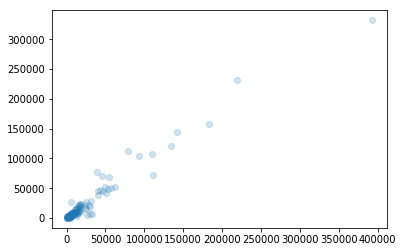

In [283]:
# Create a scatter plot of your predicted values vs. their true values
# Describe anything you observe

plt.scatter(holdout_preds, y_holdout, alpha=0.2)

Plotting my residuals, a perfect model would have a straight y=x line. Contrasting that, I could see that my model does fairly ok.

In [286]:
# Calculate your residuals (prediction - actual)
residuals = holdout_preds - y_holdout

In [293]:
residuals

StoreNumber
4663    -1667.414003
3908    11489.533351
4669     7572.444224
4204     1821.589576
4967    -3132.888976
4930     -372.729821
4801     3732.365877
3690    -4429.796569
4392    -1200.127927
4081      620.391130
4440     2034.496566
4811      374.500843
4046    -1531.765395
4660     7083.639863
4837    -1404.455701
4717      184.333203
4360     1540.202226
2850     1680.932073
4736     1611.294927
4125     1768.159605
4491     -506.148860
4790      147.627927
3876       -4.443264
4279      248.596866
3591     2292.489002
4362    -1568.166518
4896    -2177.283634
2285   -37259.684065
4709     -797.675304
4420      -60.690992
            ...     
5001    -4108.805421
4102    -2704.953592
2584    -4662.673033
4016      -42.845618
4764    -6073.162567
4475     3451.753131
4406      126.805775
3783     7651.281371
4306     3038.438589
3654     1774.426463
2806     9327.270419
4711     1372.837380
3587     2138.509695
4428      230.603222
2652     1926.977075
4630    -7428.511698
3

(array([  2.,   2.,   3.,  77.,  36.,   2.,   3.,   1.,   0.,   1.]),
 array([-37259.68406513, -27493.47685747, -17727.26964981,  -7961.06244215,
          1805.14476551,  11571.35197317,  21337.55918083,  31103.76638849,
         40869.97359616,  50636.18080382,  60402.38801148]),
 <a list of 10 Patch objects>)

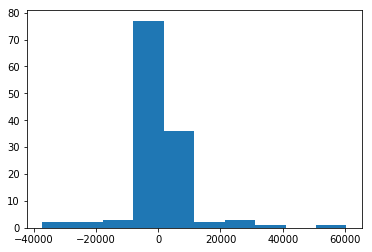

In [290]:
# Create a histogram of your residuals. Describe anything you observe
plt.hist(residuals)


Thankfully, my residuals resemble a normal distribution. There are a few big misses (residuals of 50k USD+), but most of my predictions are slightly off.  

# Final Predictions

You've created a model that predicts 2015 year end sales based on Q1 2015 data. 

In the data source, we have included data for Q1 of 2016. Apply your feature engineering process to the 2016 Q1 data, then use your trained 2015 model to predict the 2016 year end values for those stores.

Note: you do not have the 2016 year end values to evaluate against.


### Feature Engineering
Perform the same aggregation and feature creation you used on 2015 data on the 2016 data 

In [295]:
liquor2016 = liquor[liquor['Date'].dt.year == 2016]

In [297]:
liquor2016= liquor2016.assign(profitableliq=liquor2016.apply(profitable, axis=1))

In [299]:
liquor2016['Profit'] = (liquor2016.StateBottleRetail - liquor2016.StateBottleCost) * liquor2016.BottlesSold

In [301]:
liquor2016features = liquor2015_q1.groupby('StoreNumber').agg('sum')

In [304]:
liquor2016features.drop(['CountyNumber','Category','VendorNumber','ItemNumber'],inplace=True,axis=1)

In [313]:
liquor2016features

,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons,profitableliq,Profit
StoreNumber,,,,,,,,,
2106,114350,1295.36,1944.71,2705,39287.29,2526.10,667.41,15893.52,13108.37
2113,35875,442.94,664.49,196,2833.25,177.11,46.80,1100.62,944.72
2130,83150,892.66,1339.92,1533,24272.57,1447.25,382.33,11541.27,8108.68
2152,35000,307.97,462.75,154,2003.46,151.74,40.08,1379.52,668.60
2178,47325,471.19,707.93,490,5856.41,409.81,108.28,2667.45,1961.28
2190,280950,3785.16,5682.57,2557,29452.92,1666.58,440.59,9817.38,9828.30
2191,154725,1755.59,2635.55,1868,29085.57,1957.28,517.02,10870.28,9723.40
2200,94700,984.17,1478.01,338,4900.43,367.72,97.13,2517.44,1641.80
2205,61475,744.03,1116.71,466,6407.74,375.38,99.15,3306.38,2138.97


### Make Predictions

Once you have your 2016 features, use your trained 2015 model on the 2016 Q1 data to get your predictions for 2016

Do not retrain a model on the 2016 data*

In [ ]:
# Make Predictions

In [314]:
x_features = ['SaleDollars','VolumeSoldLiters','profitableliq','Profit']
liquor2016features['future_preds'] = lr.predict(liquor2016features[x_features])

In [315]:
# Show your 2016 year-end prediction for each store
list(zip(x_features,lr.coef_))

[('SaleDollars', 41.042402157583943),
 ('VolumeSoldLiters', 15.388837258902752),
 ('profitableliq', -2.4177788834124518),
 ('Profit', -109.58354076181946)]

In [316]:
liquor2016features

,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons,profitableliq,Profit,future_preds
StoreNumber,,,,,,,,,,
2106,114350,1295.36,1944.71,2705,39287.29,2526.10,667.41,15893.52,13108.37,177209.751042
2113,35875,442.94,664.49,196,2833.25,177.11,46.80,1100.62,944.72,13601.953093
2130,83150,892.66,1339.92,1533,24272.57,1447.25,382.33,11541.27,8108.68,102773.838499
2152,35000,307.97,462.75,154,2003.46,151.74,40.08,1379.52,668.60,8738.852150
2178,47325,471.19,707.93,490,5856.41,409.81,108.28,2667.45,1961.28,26074.191345
2190,280950,3785.16,5682.57,2557,29452.92,1666.58,440.59,9817.38,9828.30,134489.016666
2191,154725,1755.59,2635.55,1868,29085.57,1957.28,517.02,10870.28,9723.40,132835.259264
2200,94700,984.17,1478.01,338,4900.43,367.72,97.13,2517.44,1641.80,21563.200183
2205,61475,744.03,1116.71,466,6407.74,375.38,99.15,3306.38,2138.97,27155.570440


# Evaluation:

Do your best to answer the following questions:

* What was the best set of features you found for your model?
* Describe the relationships between your features and your target
* How did your model perform in the training phase? Against the holdout set? 
* Did it perform better or worse against the holdout set?

Finally:
* Write a short description of your analysis, describing the process you went through and your confidence in your model's predictive ability
* Include any data, or visualizations you feel would help support your findings

Relying on my Part 1 EDA, I analyzed different features of the Iowa liquor data set. Of these, I thought profitability and the categories of profitable liquor were interesting indicators of how well each store would do for the full year. I also saw that the top 5 categories of liquor were quite prominent in sales (seems that Iowans drink plenty of whiskey). I would point to these two features as my 'best' features of my model. Coming in, I assumed the two profitability indicators would work as a guide for the volume and sales coefficients. However, they ended up becoming negative relationships, meaning that the "more" profit a store made in Q1, the less full year sales I should predict. This was incredibly confusing at first, however, I can see that my two profit features make the volume and sales magnitude to be bigger, i.e., over-estimate, and then they serve as proxies to "tune" the final estimate.  

During the training phase, the model scored around 65 for its RMSE. I hoped that this score would be lower, but this may be an issue with the different magnitudes of my features. The model explains the variance of full-year sales data quite well, at 95%. My model actually performed worse against the holdout set, with a RMSE at 71. This points to potential under-fitting.

My confidence in my model is at 65%. It predicts many sales figures fairly well (looking at my residuals plot), however I would like to cut-down on the bigger misses. The cut-off at the top 5 liquor categories was arbitrary, and will need further investigation. I also have to be wary of omitted variable bias in my model features -- there is most likely some sort of feature that I am missing, that may aid in my explication of full-year sales predictions.    

Next steps for my model would to attempt to fine-tune the model further, by controlling for external factors such as time and weather -- this would be accomplished by creating a monthly sales variable, as well as creating a season dummy variable.

# Bonus - Regularization & Grid Search

As a bonus, experiment with the effect of Lasso (L1) and Ridge (L2) regularization on your linear model. Use GridSearch to tune your additional parameters.

See [gridseach 'scoring' options](http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) for a list of scoring function strings recognized by GridSeach

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.grid_search import GridSearchCV

In [ ]:
# Instantiate models
lr_ridge = 
lr_lasso = 

In [ ]:
# Use your post-holdout training data, so you can evaluate on the holdout later
X = 
y = 

Expirement with values of Alpha, scoring functions, and L1/L2 regulatization

In [ ]:
params = {'alpha':[0.2,1.0]}

In [ ]:
gs = GridSearchCV(<model>,params,cv=5,scoring='neg_mean_squared_error')

In [ ]:
# Gridsearch incorporates k-folds validation
# You do not have to create training/testing splits
gs.fit(X,y)

In [ ]:
# View all permutation scores
gs.grid_scores_

In [ ]:
# use the best set of parameters
lr_best = gs.best_estimator_

In [ ]:
# try the best estimator on your holdout set

## Evaluation:

Did regularization improve your model? What was the impact of regularization on your features? Did regularization make any features stand out?